# Tutorial - Running GUS in Amsterdam.
A demo of a minimal flow of GUS process in Amsterdam. Data Source: https://maps.amsterdam.nl

For more advanced use cases, please see upcoming article. For more structured experiment and scenario analyis plese see model sepcification and code documentation within docs/ folder. 

In [1]:
import os
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=1)
sns.set_theme()


### 0. Importing GUS modules

In [2]:
# Install the GUS framework.

# from .gus import Urban, WeatherSim, Tree, Species, SiteConfig, WeatherConfig
# from .gus import get_raster_data, latlng_array_to_xy, calculate_dataframe_area, filter_dataframe_to_bounding_box
# from .impacts import Carbon, Calibration
# from .gus.enums import HealthCondition, ProjectSiteType
from pygus import (
    Urban,
    Species,
    SiteConfig,
    ScenarioConfig,
    get_raster_data
)


## 1. Initilisation
### 1.1 Importing data on site, tree populations, experiment parameters

In [3]:
# File that holds site/city other geolocated data and parameters
fname_config_site = os.path.join("..","pygus",  "gus", "inputs", "site.json")
site_config = SiteConfig.from_file(fname_config_site)

# File that include tree species specific parameters
fname_config_allometrics = os.path.join("..", "pygus", "gus", "inputs", "allometrics.json")
allometrics = Species(fname_config_allometrics)

# File that holds experiment parameters
fname_scenario_params = os.path.join("..","pygus",  "gus", "inputs", "scenario.json")
scenario_config = ScenarioConfig.from_file(fname_scenario_params)

### 1.2 Creating a digital twin of the site

In [4]:
# local file to test the framework before testing the large 11MB A'dam data file
# pop_df = os.path.join("..", "pygus", "gus", "inputs", "amsterdam_trees_1000.csv")
pop_df = "https://treesai-gus-public.s3.eu-west-3.amazonaws.com/amsterdam_all_trees_latlng.csv"


# site = Urban(pop_df, fname_config_allometrics, fname_config_site, fname_scenario_params)
site = Urban(
    population=pop_df,
    species_allometrics=allometrics,
    site_config=site_config,
    scenario=scenario_config
)

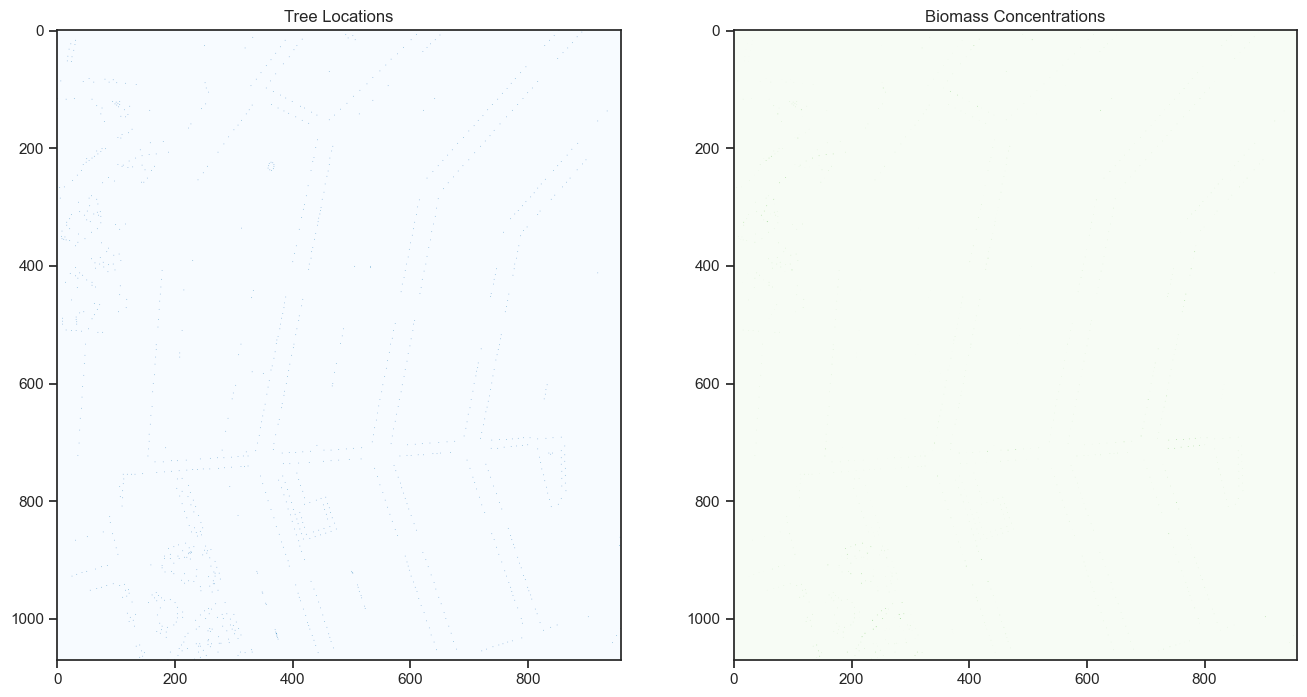

In [5]:
initial_locations = get_raster_data(site, counts=True)
initial_biomass = get_raster_data(site, var="biomass")

sns.set_style("ticks")
fig = plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(initial_locations, cmap="Blues")
plt.title("Tree Locations")
plt.subplot(122)
plt.title("Biomass Concentrations")
plt.imshow(initial_biomass, cmap="Greens")
# plt.colorbar(label = 'Biomass - Kg')
plt.show()


### 2. Running the scenario


In [6]:
df_out_site = site.run()

carbon storage:  619443.8115216006



## 3. Analysis

### 3.1 Individual tree level inspections



In [7]:
# Tree level individual variables
df_out_tree = site.get_agent_data()
# df_out_tree.to_csv("trees_yearly.json", index=True)
df_out_tree.head(10)

species        dbh     height    crownH    crownW  \
Step AgentID                                                     
1    0        decidu  11.194628   9.252676  4.803719  4.159723   
     1        decidu  11.084117   9.202947  4.773969  4.133978   
     2        decidu  11.190067   9.250628  4.802492  4.158661   
     3        decidu   6.108166   6.658127  3.376070  2.933623   
     4        decidu   3.567855   4.971792  2.618397  2.289790   
     5        decidu  13.705062  10.327592  5.464368  4.733872   
     6        decidu  13.734628  10.339688  5.471976  4.740512   
     7        decidu  11.159966   9.237103  4.794394  4.151652   
     8        decidu  11.186033   9.248816  4.801407  4.157722   
     9        decidu  13.645746  10.303287  5.449094  4.720542   

              canopy_overlap  cle  condition   dieback    biomass  ...  \
Step AgentID                                                       ...   
1    0                   0.0  1.0  excellent  0.000000  54.303468  ...   
     1                   0.0  1.0       fair  0.106813  53.104620  ...   
     2                   0.0  1.0  excellent  0.004409  54.253690  ...   
     3                   0.0  1.0  excellent  0.006246  13.893040  ...   
     4                   0.0  1.0  excellent  0.006546   4.143457  ...   
     5                   0.0  1.0       good  0.028576  85.616487  ...   
     6                   0.0  1.0  excellent  0.000000  86.032666  ...   
     7                   0.0  1.0       good  0.033502  53.925847  ...   
     8                   0.0  1.0  excellent  0.008308  54.209686  ...   
     9                   0.0  1.0       good  0.085908  84.784913  ...   

                 carbon  deroot  detrunk   mulched    burnt  xpos  ypos  \
Step AgentID                                                              
1    0        27.151734     0.0      0.0  0.000000  0.00000  1042   272   
     1        26.552310     0.0      0.0  0.141806  0.00000   927   236   
     2        27.126845     0.0      0.0  0.000000  0.00598   893   205   
     3         6.946520     0.0      0.0  0.002169  0.00000  1019   302   
     4         2.071729     0.0      0.0  0.000678  0.00000   921   501   
     5        42.808244     0.0      0.0  0.061165  0.00000   331    16   
     6        43.016333     0.0      0.0  0.000000  0.00000  1040   292   
     7        26.962924     0.0      0.0  0.045166  0.00000   320    21   
     8        27.104843     0.0      0.0  0.011259  0.00000   313    24   
     9        42.392457     0.0      0.0  0.182092  0.00000   884   255   

                est_age        lat       lng  
Step AgentID                                  
1    0        11.928179  52.360817  4.900639  
     1        11.928179  52.360517  4.898940  
     2        11.928179  52.360248  4.898435  
     3         5.867573  52.361094  4.900324  
     4         2.837270  52.362902  4.898951  
     5        14.958482  52.358680  4.890110  
     6        14.958482  52.360999  4.900617  
     7        11.928179  52.358729  4.889944  
     8        11.928179  52.358763  4.889841  
     9        14.958482  52.360696  4.898310  

[10 rows x 21 columns]

In [11]:
Specific_Tree = df_out_tree.xs(348, level="AgentID")
# Specific_Tree.tail(50)

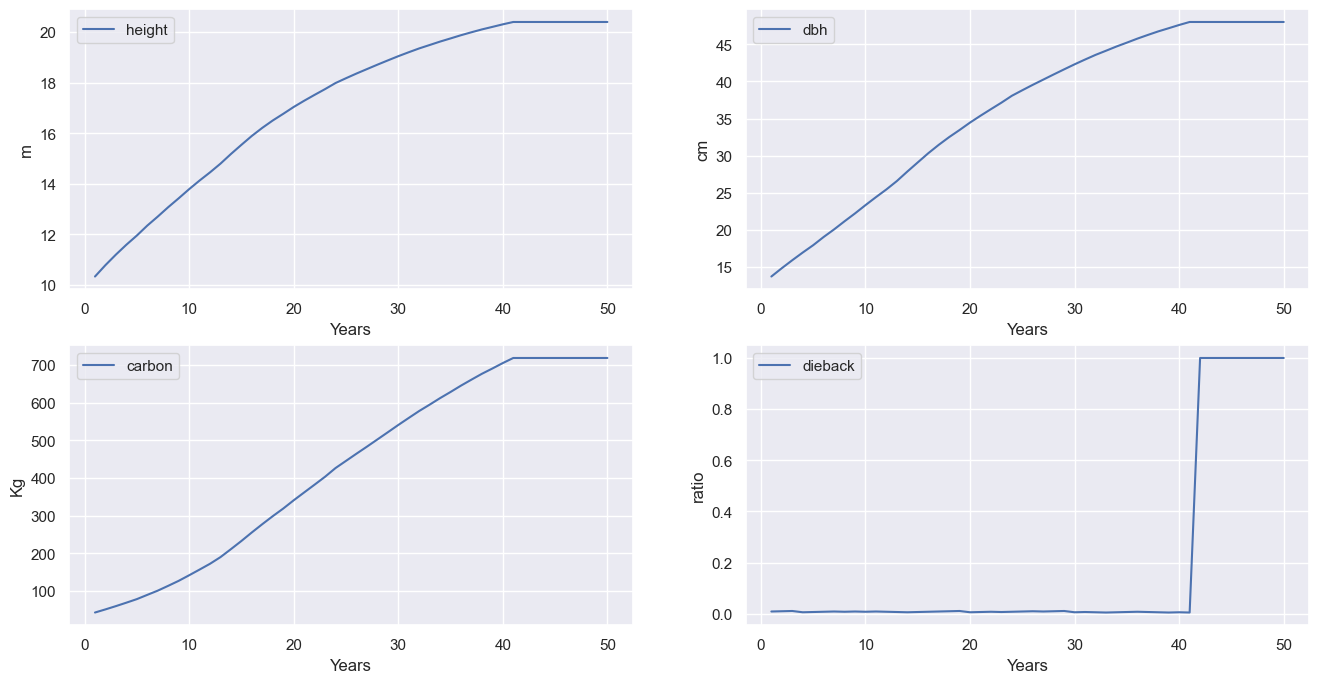

In [12]:
sns.set_theme()
fig = plt.figure(figsize=(16, 8))
plt.subplot(221)
Specific_Tree.height.plot()
plt.xlabel("Years")
plt.ylabel("m")
plt.legend()
plt.subplot(222)
Specific_Tree.dbh.plot()
plt.xlabel("Years")
plt.ylabel("cm")
plt.legend()
plt.subplot(223)
Specific_Tree.carbon.plot()
plt.xlabel("Years")
plt.ylabel("Kg")
plt.legend()
plt.subplot(224)
Specific_Tree.dieback.plot()
plt.xlabel("Years")
plt.ylabel("ratio")
plt.legend()
plt.show()

In [13]:
# Site level aggregate variables
df_out_site.tail()

,Storage,Seq,Avg_Seq,Released,Avg_Rel,Alive,Dead,Critical,Dying,Poor,Replaced,Seq_std,Cum_Seq
45,566987.143429,12590.470589,11.712066,9561.944764,8.808632,1075,124,0,0,0,3075,6.235827,535430.911266
46,580648.986655,13566.170777,12.526473,6778.486357,5.968392,1083,116,0,0,0,3139,6.624609,548997.082044
47,593466.376867,12732.568950,11.955464,8640.149847,8.068923,1065,134,0,0,0,3199,6.214065,561729.650994
48,606566.313521,12987.186310,12.286837,7730.863194,7.396996,1057,142,0,0,0,3274,6.351195,574716.837304
49,619443.811522,12779.578314,12.078997,7201.783420,6.659295,1058,141,0,0,0,3342,6.199529,587496.415618


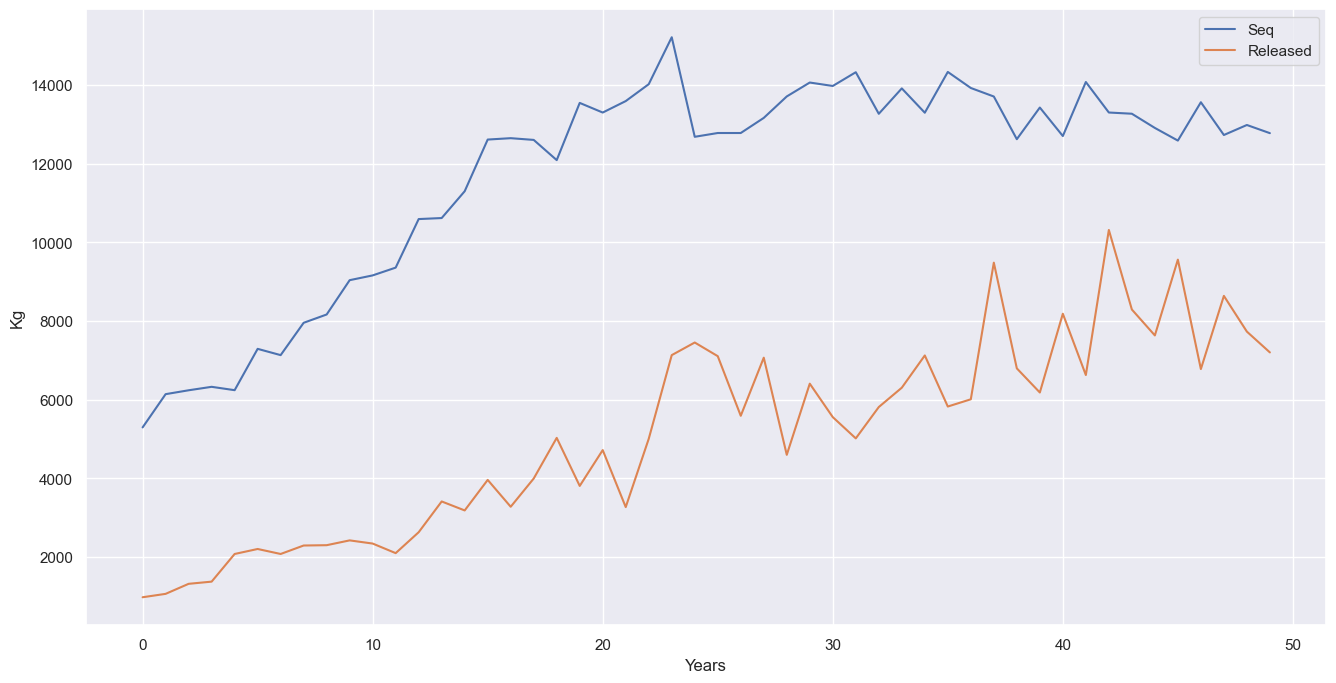

In [14]:
fig = plt.figure(figsize=(16, 8))
df_out_site.Seq.plot()
df_out_site.Released.plot()
plt.xlabel("Years")
plt.ylabel("Kg")
plt.legend()
plt.show()

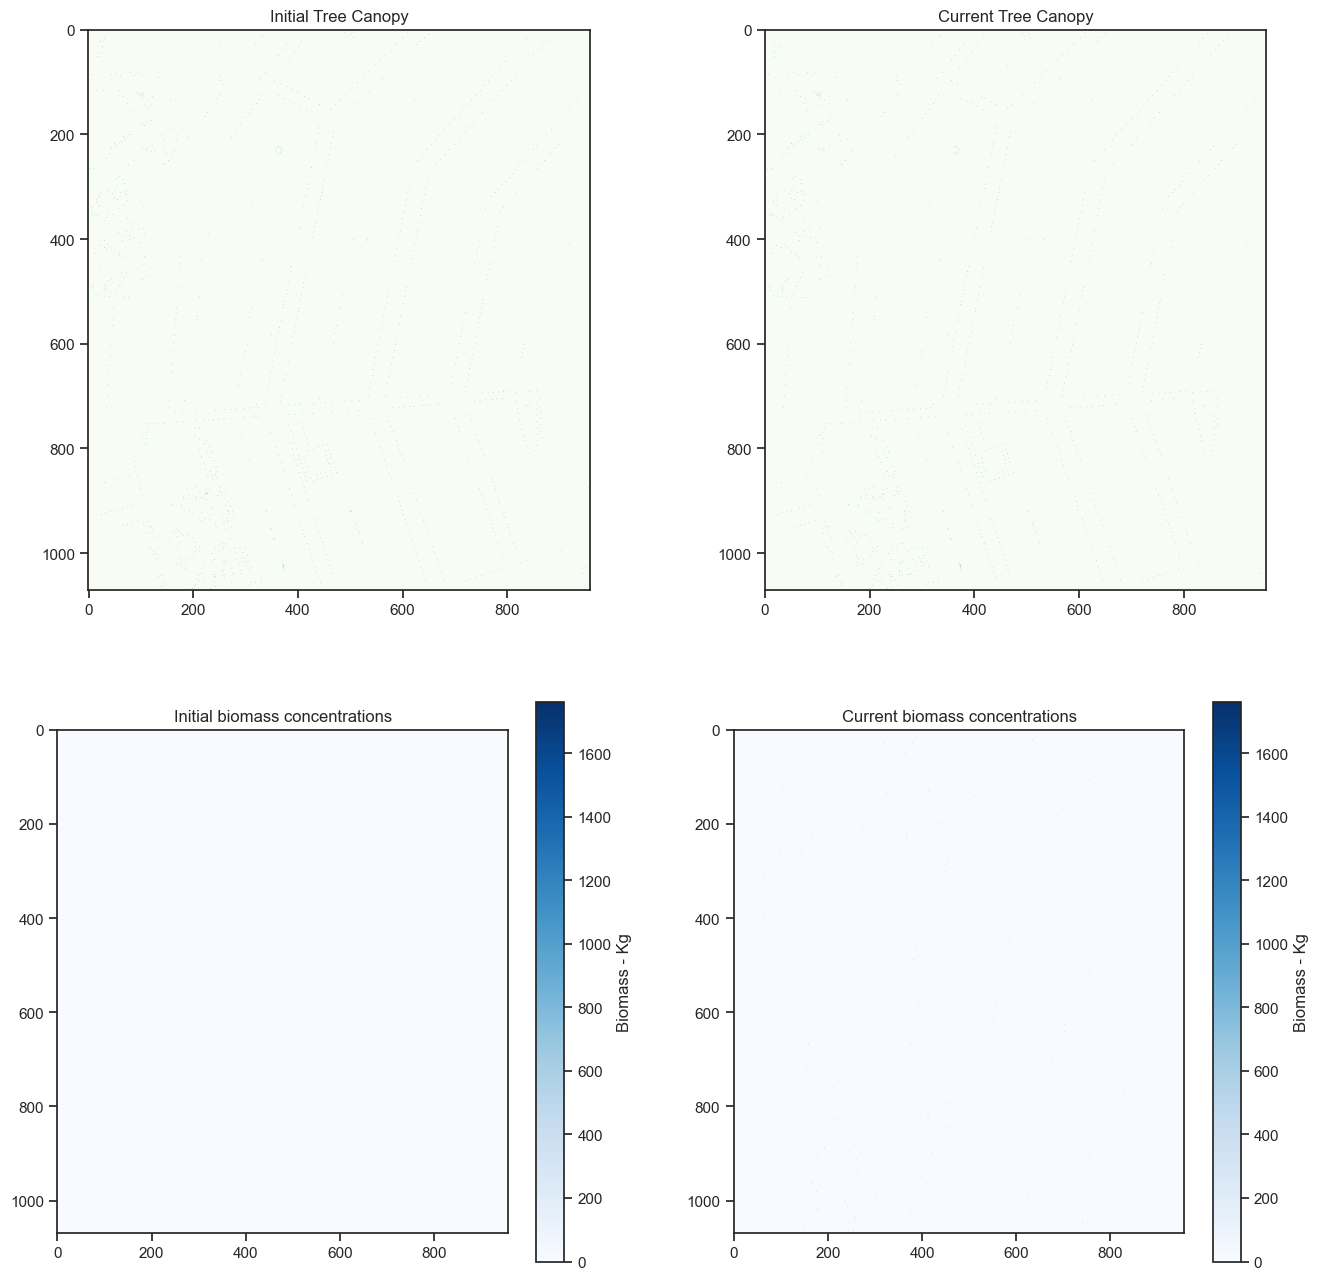

In [15]:
locations = get_raster_data(site, counts=True)
biomass = get_raster_data(site, var="biomass")

sns.set_style("ticks")
fig = plt.figure(figsize=(16, 16))
plt.subplot(221)
plt.imshow(initial_locations, cmap="Greens")
plt.title("Initial Tree Canopy")

plt.subplot(222)
plt.imshow(locations, cmap="Greens")
plt.title("Current Tree Canopy")

plt.subplot(223)
plt.title("Initial biomass concentrations")
plt.imshow(initial_biomass, cmap="Blues", vmin=0, vmax=biomass.max())
plt.colorbar(label="Biomass - Kg")

plt.subplot(224)
plt.title("Current biomass concentrations")
plt.imshow(biomass, cmap="Blues")
plt.colorbar(label="Biomass - Kg")
plt.show()